In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


We will use the heart attack dataset containing following parameters, to predict the chances of heart attack in patients:

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

caa: number of major vessels (0-3)

cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
heart_data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#check datatypes
heart_data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
#check for missing values 
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# EDA

   output
1     165
0     138


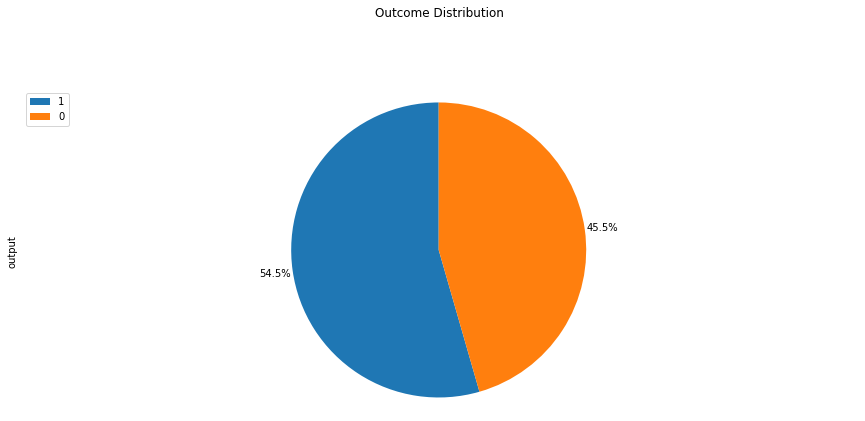

In [6]:
# Output distribution
outcome = heart_data['output'].value_counts().to_frame()
print(outcome)
outcome['output'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90, 
                            labels=None,         
                            pctdistance=1.12,
                            )

plt.title('Outcome Distribution', y=1.2) 
plt.axis('equal') 
plt.legend(labels=outcome.index, loc='upper left') 
plt.show()

In [7]:
# Age break Down 
group_names_age = ['20\'s', '30\'s', '40\'s', '50\'s', '60\'s', '70\'s']
heart_data['AgeG'] = pd.cut(heart_data['age'], bins=[20,29,39,49,59,69,79], labels=group_names_age, 
                            include_lowest=True )

heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,AgeG
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60's
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30's
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40's
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50's
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,50's
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,40's
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,60's
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,50's


Age Break Down
50's    125
60's     80
40's     72
30's     15
70's     10
20's      1
Name: AgeG, dtype: int64


Text(0.5, 1.0, 'Age Break Down ')

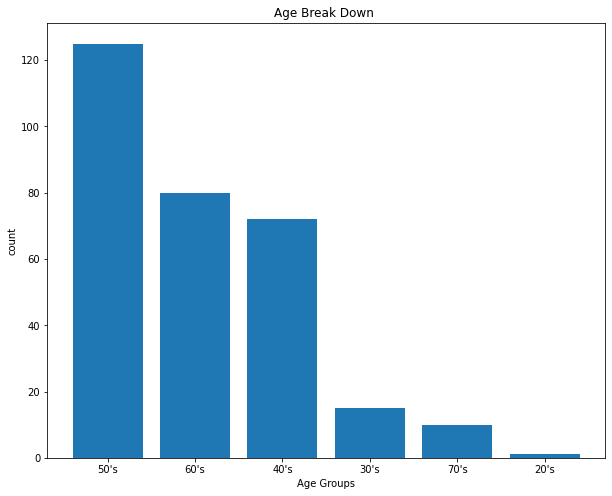

In [8]:
#Age break down
ageG = heart_data.AgeG.value_counts().to_frame()
ageG.index

print('Age Break Down')
print(heart_data.AgeG.value_counts())

plt.figure(figsize = (10,8))
pyplot.bar(ageG.index, heart_data["AgeG"].value_counts())

pyplot.xlabel("Age Groups")
pyplot.ylabel("count")
pyplot.title("Age Break Down ")

The dataset consist largely of people in their 50's, 60's and 40's. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Exercise induced angina. 0 = No 1 = Yes 

0    204
1     99
Name: exng, dtype: int64


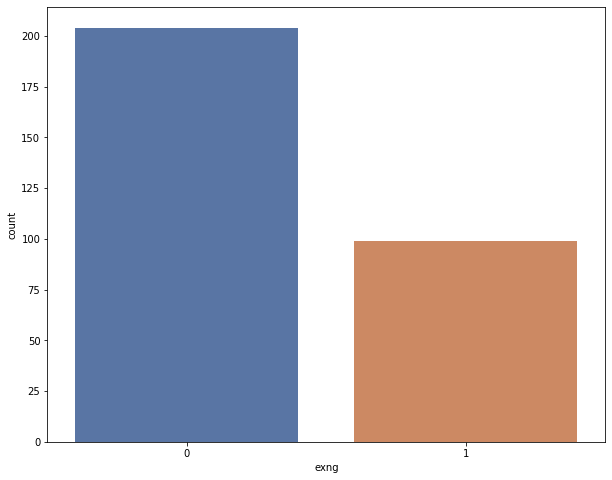

In [9]:
# Exercise induced angina distribution
plt.figure(figsize=(10, 8))
sns.countplot(heart_data["exng"], palette = 'deep')
print('Exercise induced angina. 0 = No 1 = Yes \n')
print(heart_data.exng.value_counts())

1/3 of the dataset participants experience exercise induced angina. 

Chest Pain type. 
 Value 0: typical angina, Value 1: atypical angina, 
 Value 2: non-anginal pain, Value 3: asymptomatic


output
cp output        
0  0          104
   1           39
1  0            9
   1           41
2  0           18
   1           69
3  0            7
   1           16

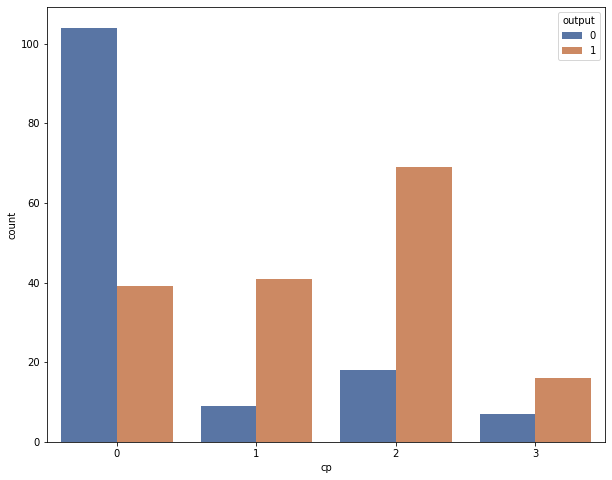

In [10]:
# Chest Pain type distribution
# Value 0: typical angina, Value 1: atypical angina, 
# Value 2: non-anginal pain, Value 3: asymptomatic
plt.figure(figsize=(10, 8))
sns.countplot(x ='cp', hue = "output", data = heart_data, palette = 'deep')
print('Chest Pain type. \n Value 0: typical angina, Value 1: atypical angina,' ,
      '\n Value 2: non-anginal pain, Value 3: asymptomatic')
heart_data.groupby(['cp', 'output'])['output'].count().to_frame()

Fasting Blood Sugar > 120 mg/dl. 
 0 = No 1 = Yes

0    258
1     45
Name: fbs, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


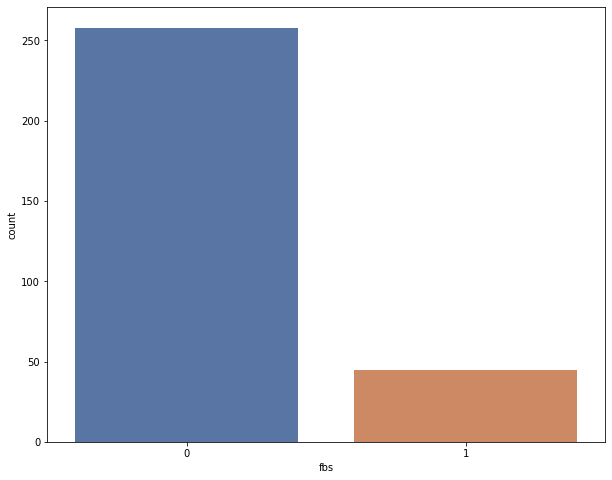

In [11]:
# fasting blood sugar distribution
plt.figure(figsize=(10, 8))
sns.countplot(heart_data["fbs"], palette = 'deep')
print('Fasting Blood Sugar > 120 mg/dl. \n 0 = No 1 = Yes\n')
print(heart_data.fbs.value_counts())

85% of the dataset participants fasting blood sugar is below 120.

In [12]:
# find the mean values based on output for trtbps : resting blood pressure (in mm Hg), 
# chol : cholestoral in mg/dl fetched via BMI sensor, thalach : maximum heart rate achieved and oldpeak
grouped = heart_data.groupby('output').mean()
grouped[['trtbps', 'chol', 'thalachh', 'oldpeak']]

,trtbps,chol,thalachh,oldpeak
output,,,,
0,134.398551,251.086957,139.101449,1.585507
1,129.303030,242.230303,158.466667,0.583030


<Figure size 720x576 with 0 Axes>

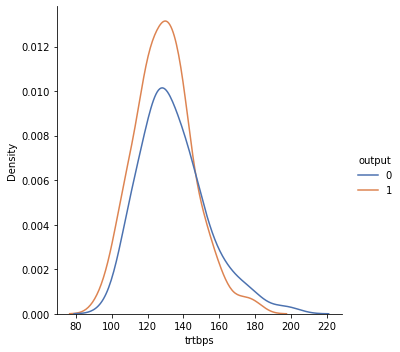

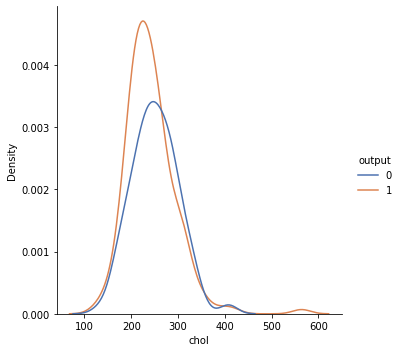

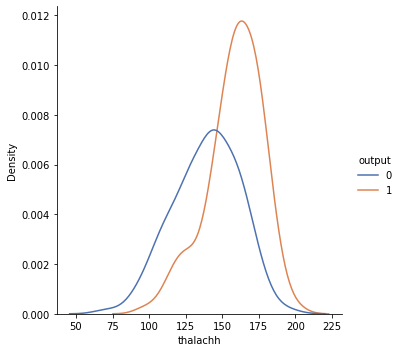

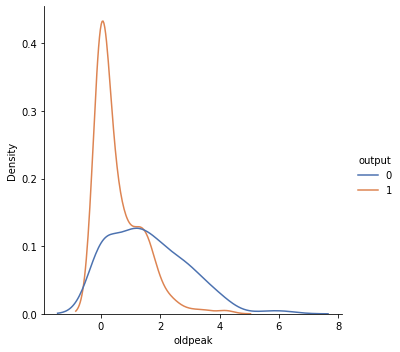

In [13]:
plt.figure(figsize=(10, 8))
varibales = ['trtbps', 'chol', 'thalachh', 'oldpeak']
for x in varibales:
    sns.displot(x = x, data=heart_data, hue = 'output', kind = 'kde', palette = 'deep')

In [14]:
# convert age column.  1 to male and 0 to female 
heart_data['M/F'] = heart_data['sex'].apply(lambda x : 'Male' if x == 1 else 'Female')
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,AgeG,M/F
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60's,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30's,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40's,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50's,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50's,Female


Sex distribution 

Male      207
Female     96
Name: M/F, dtype: int64


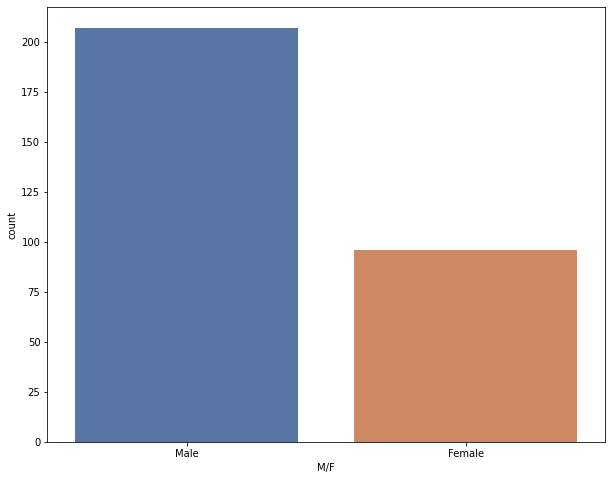

In [15]:
plt.figure(figsize=(10, 8))
print('Sex distribution \n')
sns.countplot(x='M/F', data=heart_data, palette = 'deep')
print(heart_data['M/F'].value_counts())

The dataset has more twice as much males to females.

Age and output distribution.



output
AgeG output        
20's 0            0
     1            1
30's 0            4
     1           11
40's 0           22
     1           50
50's 0           60
     1           65
60's 0           48
     1           32
70's 0            4
     1            6

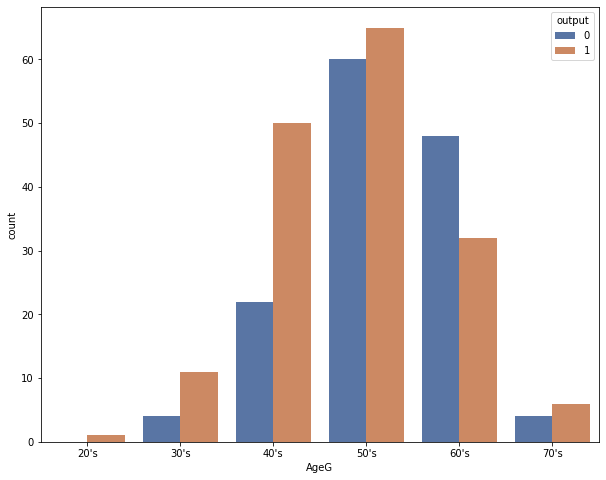

In [16]:
#Age and output
plt.figure(figsize=(10, 8))
print('Age and output distribution.\n')
sns.countplot(x='AgeG', data = heart_data, hue='output', palette = 'deep')
heart_data.groupby(['AgeG', 'output'])['output'].count().to_frame()

Sex and output distribution.



output
M/F    output        
Female 0           24
       1           72
Male   0          114
       1           93

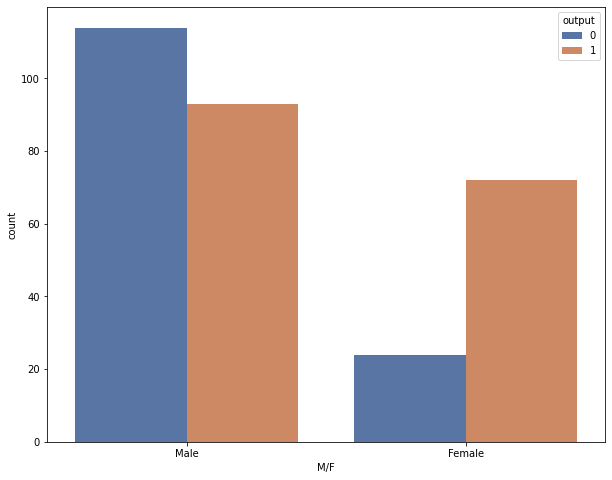

In [17]:
#Sex and ouput
plt.figure(figsize=(10, 8))
print('Sex and output distribution.\n')
sns.countplot(x='M/F', data = heart_data, hue = 'output', palette = 'deep')
heart_data.groupby(['M/F', 'output'])['output'].count().to_frame()

Of the dataset female participants 72/96 or 75% have a output of 1. 1 = more chance of heart attack. 
In contrast, of the dataset male participants 93/207 or 45% have a output of 1.

Number of major vessels and output distribution.



output
caa output        
0   0           45
    1          130
1   0           44
    1           21
2   0           31
    1            7
3   0           17
    1            3
4   0            1
    1            4

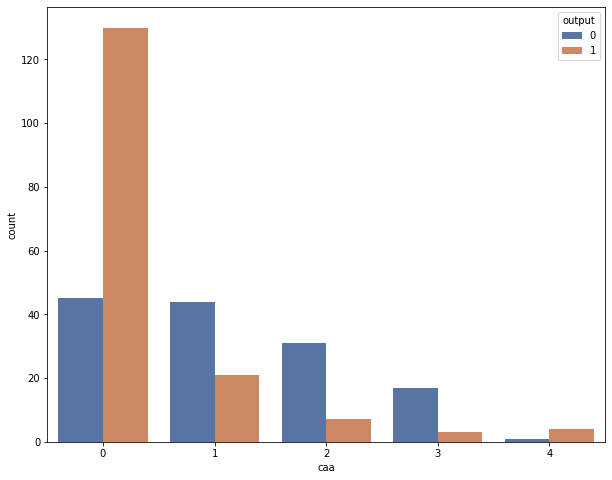

In [18]:
#number of major vessels (0-3) and ouput
plt.figure(figsize=(10, 8))
print('Number of major vessels and output distribution.\n')
sns.countplot(x='caa', data = heart_data, hue = 'output', palette = 'deep')
heart_data.groupby(['caa', 'output'])['output'].count().to_frame()

Of the dataset participants people with 0 major vessels had the greatest risk of a heart attack. 
The risk of heart attack falls with the increase number of major vessels. 

# Model

In [19]:
# feature selection 
x = heart_data.drop(['output', 'AgeG', 'M/F'], axis=1)
y = heart_data['output'].values

In [20]:
# feature scaling 
sc = StandardScaler()
X = sc.fit_transform(x)

In [21]:
# train and test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 5)

In [22]:
# train and test shapes 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [23]:
#Stop model training when validation accuracy hits a certian level 
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.91:
                print("\nReached greater than 91% accuracy so cancelling training!")
                self.model.stop_training = True

In [24]:
# Build model, compile model, train and validate model preformace
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, input_dim=13, activation='relu'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(32, activation='sigmoid'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = myCallback()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
histo = model.fit(X_train, y_train, epochs=50, batch_size=64, callbacks=[callbacks],
                  verbose = 1, validation_data=(X_test, y_test))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/50
4/4 [==============================] - 1s 90ms/step - loss: 0.6999 - accuracy: 0.5413 - val_loss: 0.6734 - val_accuracy: 0.5738
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 0.6759 - accuracy: 0.5992 - val_loss: 0.6554 - val_accuracy: 0.5410
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6646 - accuracy: 0.5744 - val_loss: 0.6338 - val_accuracy: 0.6721
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 0.6514 - accuracy: 0.6198 - val_loss: 0.6041 - val_accuracy: 0.7541
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.6061 - accuracy: 0.7273 - val_loss: 0.5710 - val_accuracy: 0.8689
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.5961 - accuracy: 0.7190 - val_loss: 0.5347 - val_accuracy: 0.8689
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.5607 - accuracy: 0.7810 - val_loss: 0.4977 - val_accuracy: 0.8689
Epoch 8/50
4/4 [===========

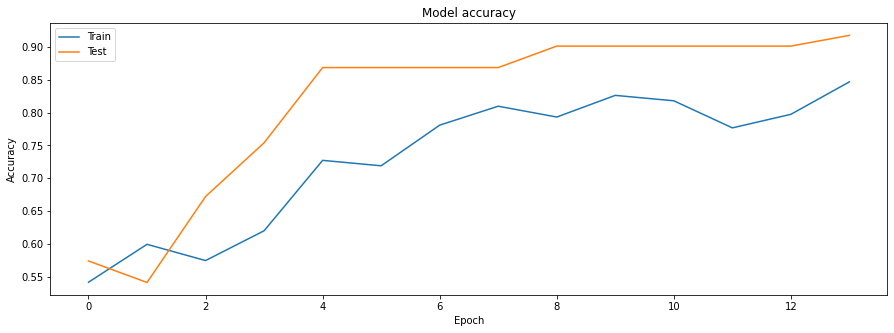

In [25]:
# graph model accuracy of training and testing subsets 
plt.figure(figsize=(15,5))
plt.plot(histo.history['accuracy'])
plt.plot(histo.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

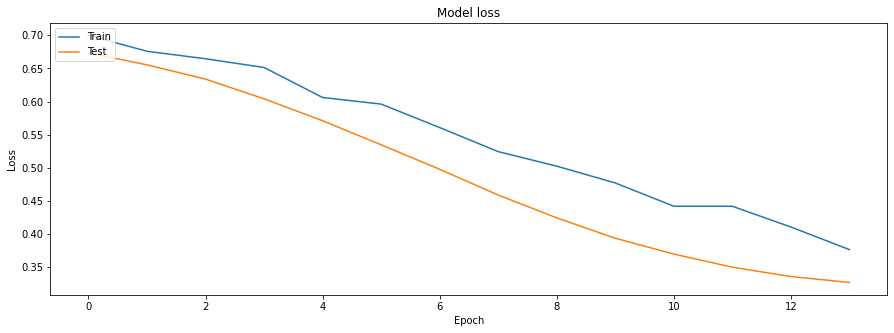

In [26]:
# graph the loss of both training and testing subsets 
plt.figure(figsize=(15,5))
plt.plot(histo.history['loss']) 
plt.plot(histo.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()